# Setup

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:18
🔁 Restarting kernel...


In [ ]:
!git clone https://github.com/cch1999/posecheck.git
!conda install -c mx reduce
!pip install -e /content/posecheck/
!pip install -r /content/posecheck/requirements.txt
!conda install -c conda-forge openbabel

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import sys
sys.path.insert(0,'/content/posecheck/')

Mounted at /content/gdrive


In [ ]:
from posecheck import PoseCheck
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os

# Analysis of DiffDock

## Set up of data pipelines

In [ ]:
import pandas as pd

df = pd.read_csv('/content/testset_csv.csv')
del df['protein_sequence']
df['Predicted_Mol_path'] = "NA"
df['protein_path'] = 'NA'
df['1'] = '1'
df['2'] = '1'
df['3'] = '1'
df['4'] = '1'
df['5'] = '1'
df['6'] = '1'
df['7'] = '1'
df['8'] = '1'
df['9'] = '1'
df['10'] = '1'
df

,complex_name,protein_path,ligand_description,Predicted_Mol_path,1,2,3,4,5,6,7,8,9,10
0,0,NA,data/PDBBind_processed/6qqw/6qqw_ligand.mol2,NA,1,1,1,1,1,1,1,1,1,1
1,1,NA,data/PDBBind_processed/6d08/6d08_ligand.sdf,NA,1,1,1,1,1,1,1,1,1,1
2,2,NA,data/PDBBind_processed/6jap/6jap_ligand.sdf,NA,1,1,1,1,1,1,1,1,1,1
3,3,NA,data/PDBBind_processed/6np2/6np2_ligand.sdf,NA,1,1,1,1,1,1,1,1,1,1
4,4,NA,data/PDBBind_processed/6uvp/6uvp_ligand.sdf,NA,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,358,NA,data/PDBBind_processed/6pya/6pya_ligand.mol2,NA,1,1,1,1,1,1,1,1,1,1
359,359,NA,data/PDBBind_processed/6ffe/6ffe_ligand.sdf,NA,1,1,1,1,1,1,1,1,1,1
360,360,NA,data/PDBBind_processed/6d3x/6d3x_ligand.sdf,NA,1,1,1,1,1,1,1,1,1,1
361,361,NA,data/PDBBind_processed/6gj8/6gj8_ligand.mol2,NA,1,1,1,1,1,1,1,1,1,1


In [ ]:
mylist = []
for i in range(363):
  mylist.append(df['ligand_description'].iloc[i].split('/')[2])

print(mylist)

['6qqw', '6d08', '6jap', '6np2', '6uvp', '6oxq', '6jsn', '6hzb', '6qrc', '6oio', '6jag', '6moa', '6hld', '6i9a', '6e4c', '6g24', '6jb4', '6s55', '6seo', '6dyz', '5zk5', '6jid', '5ze6', '6qlu', '6a6k', '6qgf', '6e3z', '6te6', '6pka', '6g2o', '6jsf', '5zxk', '6qxd', '6n97', '6jt3', '6qtr', '6oy1', '6n96', '6qzh', '6qqz', '6qmt', '6ibx', '6hmt', '5zk7', '6k3l', '6cjs', '6n9l', '6ibz', '6ott', '6gge', '6hot', '6e3p', '6md6', '6hlb', '6fe5', '6uwp', '6npp', '6g2f', '6mo7', '6bqd', '6nsv', '6i76', '6n53', '6g2c', '6eeb', '6n0m', '6uvy', '6ovz', '6olx', '6v5l', '6hhg', '5zcu', '6dz2', '6mjq', '6efk', '6s9w', '6gdy', '6kqi', '6ueg', '6oxt', '6oy0', '6qr7', '6i41', '6cyg', '6qmr', '6g27', '6ggb', '6g3c', '6n4e', '6fcj', '6quv', '6iql', '6i74', '6qr4', '6rnu', '6jib', '6izq', '6qw8', '6qto', '6qrd', '6hza', '6e5s', '6dz3', '6e6w', '6cyh', '5zlf', '6om4', '6gga', '6pgp', '6qqv', '6qtq', '6gj6', '6os5', '6s07', '6i77', '6hhj', '6ahs', '6oxx', '6mjj', '6hor', '6jb0', '6i68', '6pz4', '6mhb', '6uim',

In [ ]:
import os
directory = '/content/gdrive/MyDrive/Protein_data/user_predictions_testset/'
predicted_ligand = []
for filename in os.listdir(directory):
  if 'index' in filename:
    f = os.path.join(directory, filename)
    #print(filename)
    for filename2 in os.listdir(f):
      if "rank1.sdf" in filename2:
        g = os.path.join(f, filename2)
        #print(filename[5:8])
        predicted_ligand.append((filename[5:8],g))
        #print(g)

In [ ]:
for item in predicted_ligand:
  for i in range(363):
    if item[0][-1].isdigit():
      index = int(item[0])
    elif item[0][-2].isdigit():
      index = int(item[0][:2])
    else:
      index = int(item[0][0])
    if index == df['complex_name'].iloc[i]:
      df['Predicted_Mol_path'].iloc[i] = item[1]

In [ ]:

rootdir2 = '/content/gdrive/MyDrive/Protein_data/inference_output'

reference_proteins = []
for filename in os.listdir(rootdir2):
  if filename in mylist:
    f = os.path.join(rootdir2, filename)
    #print(filename)

    for filename2 in os.listdir(f):
      if "protein" in filename2:
        g = os.path.join(f, filename2)
        reference_proteins.append((filename,g))

In [ ]:
for item in reference_proteins:
  for i in range(363):
    if item[0] == df['ligand_description'].iloc[i].split('/')[2]:
      df['protein_path'].iloc[i] = item[1]

In [ ]:
df

,complex_name,protein_path,ligand_description,Predicted_Mol_path,1,2,3,4,5,6,7,8,9,10
0,0,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6qqw/6qqw_ligand.mol2,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
1,1,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6d08/6d08_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
2,2,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6jap/6jap_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
3,3,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6np2/6np2_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
4,4,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6uvp/6uvp_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,358,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6pya/6pya_ligand.mol2,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
359,359,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6ffe/6ffe_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
360,360,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6d3x/6d3x_ligand.sdf,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1
361,361,/content/gdrive/MyDrive/Protein_data/inference...,data/PDBBind_processed/6gj8/6gj8_ligand.mol2,/content/gdrive/MyDrive/Protein_data/user_pred...,1,1,1,1,1,1,1,1,1,1


## Analysis of energy and clashes

In [ ]:
pc = PoseCheck()

values = []

for i in range(363):
  protein = df['ligand_description'].iloc[i].split('/')[2]
  if df['protein_path'].iloc[i] != "NA":
    pc.load_protein_from_pdb(df['protein_path'].iloc[i])

    pc.load_ligands_from_sdf(df['Predicted_Mol_path'].iloc[i])
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([protein,clashes[0],strain[0],interactions])

In [ ]:
#proteins that don;t work
#pc.load_protein_from_pdb(df['protein_path'].iloc[171])
#pc.load_protein_from_pdb(df['protein_path'].iloc[210])
#pc.load_protein_from_pdb(df['protein_path'].iloc[287])

In [ ]:
pc = PoseCheck()

values = []

for i in range(363):
  protein = df['ligand_description'].iloc[i].split('/')[2]
  if df['protein_path'].iloc[i] != "NA":
    pc.load_protein_from_pdb(df['protein_path'].iloc[i])

    pc.load_ligands_from_sdf(df['Predicted_Mol_path'].iloc[i])
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    #interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([protein,clashes[0],strain[0]])

In [ ]:
for i in range(172,363):
  protein = df['ligand_description'].iloc[i].split('/')[2]
  if df['protein_path'].iloc[i] != "NA":
    pc.load_protein_from_pdb(df['protein_path'].iloc[i])

    pc.load_ligands_from_sdf(df['Predicted_Mol_path'].iloc[i])
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    #interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([protein,clashes[0],strain[0]])

In [ ]:
for i in range(211,363):
  protein = df['ligand_description'].iloc[i].split('/')[2]
  if df['protein_path'].iloc[i] != "NA":
    pc.load_protein_from_pdb(df['protein_path'].iloc[i])

    pc.load_ligands_from_sdf(df['Predicted_Mol_path'].iloc[i])
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    #interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([protein,clashes[0],strain[0]])

In [ ]:
for i in range(288,363):
  protein = df['ligand_description'].iloc[i].split('/')[2]
  if df['protein_path'].iloc[i] != "NA":
    pc.load_protein_from_pdb(df['protein_path'].iloc[i])

    pc.load_ligands_from_sdf(df['Predicted_Mol_path'].iloc[i])
    # Check for clashes
    clashes = pc.calculate_clashes()
    #print(f"Number of clashes in example molecule: {clashes[0]}")

    # Check for strain
    strain = pc.calculate_strain_energy()
    #print(f"Strain energ of example moleculey: {strain[0]}")

    # Check for interactions
    #interactions = pc.calculate_interactions()
    #print(f"Interactions of example molecule: {interactions}")
    values.append([protein,clashes[0],strain[0]])

In [ ]:
import numpy as np
values2 = np.array(values)
print(values2)

[['6qqw' '11' '30.680000000000007']
 ['6d08' '97' '298.32']
 ['6jap' '31' '192.77']
 ...
 ['6d3x' '202' '292687336.5']
 ['6gj8' '22' '51.01000000000002']
 ['6mo2' '25' '169.95999999999998']]


In [ ]:
df2a= pd.DataFrame(values2)
df2a.to_csv("file.csv")

In [ ]:
values2.T[1]
y = np.array([int(i) for i in values2.T[1]])

In [ ]:
values2.T[1]
z = np.array([float(i) for i in values2.T[2]])
values2.T[2] = z

In [ ]:
np.argmax(z[~np.isnan(z)])

245

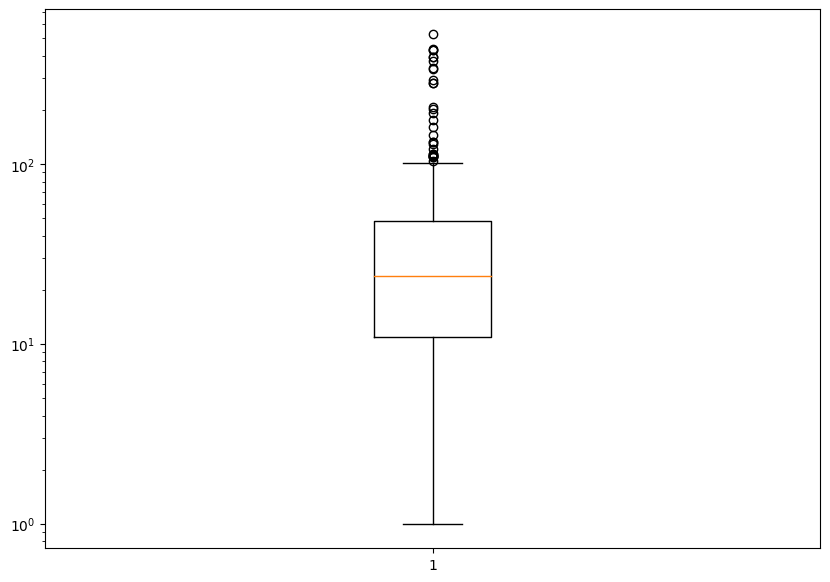

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.yscale("log")
plt.boxplot(y)
plt.show()
plt.savefig('Diffdock Clashes.png')

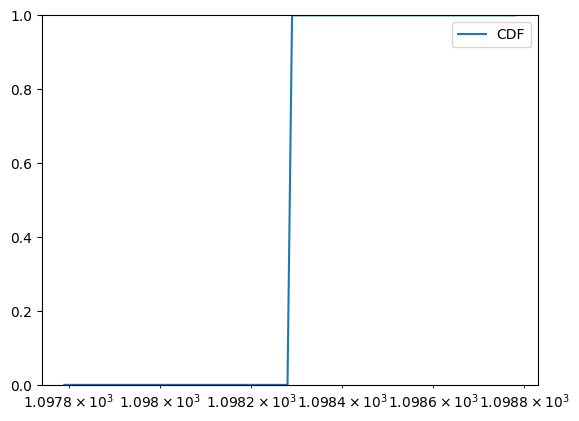

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
data = z[~np.isnan(z)]
count, bins_count = np.histogram(data[~245], bins=100)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xscale('log')
plt.ylim(0, 1)
plt.legend()
plt.show()
plt.savefig('Strain .png')

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1097.78, 1097.88, 1097.98, 1098.08, 1098.18, 1098.28, 1098.38,
        1098.48, 1098.58, 1098.68, 1098.78]),
 <BarContainer object of 10 artists>)

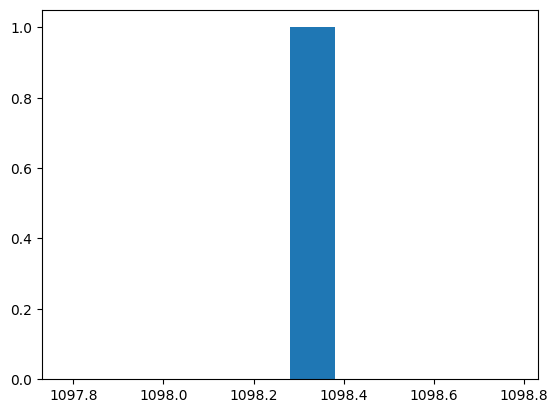

In [ ]:
plt.hist(data[~245])

In [ ]:
np.median(data[~245])

1098.2800000000002

In [ ]:
with open('/content/gdrive/MyDrive/Protein_data/user_predictions_testset/complex_names.npy', 'rb') as f:
    complex_names = np.load(f)

In [ ]:
with open('/content/gdrive/MyDrive/Protein_data/user_predictions_testset/rmsds.npy', 'rb') as f:
    rmsd = np.load(f)

In [ ]:
what = []
for i in range(363):
  what.append([complex_names[i].split('/')[2], float(rmsd[i][0])])

what = np.array(what)
what

In [ ]:
y_1 = []
for item in values2.T[0]:
  for i in range(what.shape[0]):
    if item == what[i,0]:
      y_1.append(float(what[i,1]))

y_1 = np.array(y_1)


In [ ]:
np.corrcoef(y_1, y)

array([[1.        , 0.27004545],
       [0.27004545, 1.        ]])